# Auto Dataset
Dataset source: PA2  
Note: copy your `auto-data-removed-NA.txt` from PA2 to `input_data/auto-data-removed-NA.txt`

## Step 1 Frequency Diagrams:
* Reference the *Step 1 Frequency Diagrams* section in *VGSales.ipynb* for a EDA of this section (they are the same)

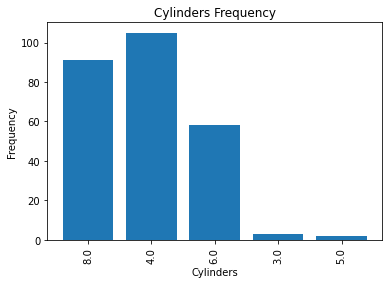

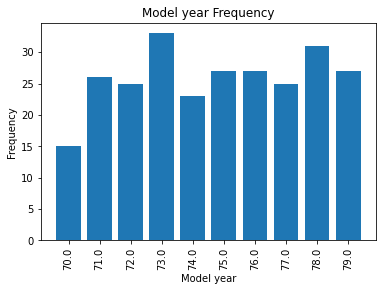

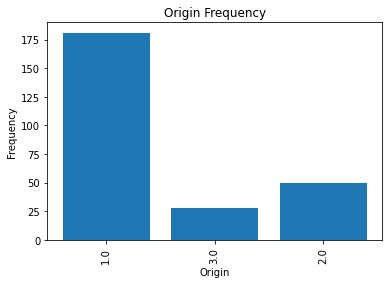

In [2]:
import utils
import plot_utils
import importlib
import mypytable 
import os
import matplotlib.pyplot as plt

importlib.reload(utils)                 # reload utils
table = utils.table_set("auto-data-removed-NA.txt")  # populate table data

# Platform BoxPlot
column_list = mypytable.MyPyTable.get_column(table, "Cylinders")
x, x_names, y = utils.col_barchart_data_plot_prep(column_list)
plot_utils.bar_chart(x, x_names, y, "Frequency", "Cylinders")
# Year BoxPlot
column_list = mypytable.MyPyTable.get_column(table, "Model year")
x, x_names, y = utils.col_barchart_data_plot_prep(column_list)
plot_utils.bar_chart(x, x_names, y, "Frequency", "Model year")
# Genre BoxPlot
column_list = mypytable.MyPyTable.get_column(table, "Origin")
x, x_names, y = utils.col_barchart_data_plot_prep(column_list)
plot_utils.bar_chart(x, x_names, y, "Frequency", "Origin")

## Step 2 Discretization and Frequency Diagrams
* Reload *utils* and *plot_utils* to avoid the gotcha.
    ### Approach 1: The US Department of Energy assigns gasoline vehicles a fuel economy rating from 1 (worst) to 10 (best). The ratings are defined in terms of MPG as follows:
    <img src="mpg.png" width="100"/>

* The plotting for this approach is the same as any of the other bar charts I have shown. However I did need to make a new function `MPG_ratings_Data_Prep(column_list)` that will iterate the `column_list`'s values and check what their rating is based on the US Department of Energy's chart. The frequency was then determined based on this charts values and stored accordingly.
    ### Approach 2: Create 5 "equal-width" bins to generate categories. Each bin should divide up the range of MPG values into equal subranges, where value 1 denotes the smallest subrange of values and 5 the largest subrange of values.
    Approach 2 was a bit more involved than Approach 1 as there was more functions and calculations that needed to take place to acheive the desired result.
    1. The first of which was the function `def compute_equal_width_cutoffs(values, num_bins)` which I transfered over from our class examples. Essentially what this function does is take all the values given and calulate cutoffs based on the amount of values given and their actual numerical value. This results **n** cutoff values that will reprisent **n-1** frequencies.
    1. The second was the function `def compute_freq(values, cutoffs)` which was also taken from an inclass example. This functions purpose is to use the newly calculated **n** cutoffs and determine the frequency of values that fall between any two cutoff points, resulting in a list of **n-1** frequencies.
    1. The last function is `def plot_bar_hist(cutoffs, bin_freqs, y_title, x_title)` in *plot_utils.py* this time and of my own creation. This function plots a bar chart, but the key difference is it goes bar by bar. This is necessary as we have **n-1** frequencuies that pertain to **n** cutoffs, so we can not plot them simply as before. Going Bar by bar allows us to plot the same amount of bars as frequencies and label each accordingly.

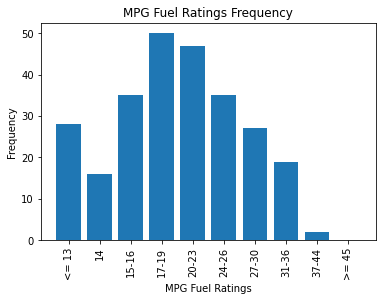

[10.0, 16.62, 23.24, 29.86, 36.48, 43.1]
[79, 97, 56, 25, 2]


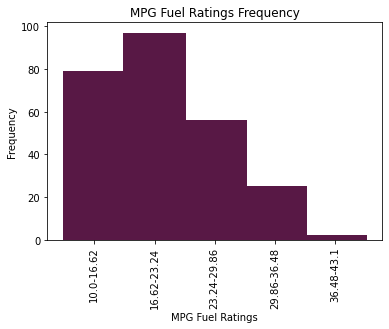

In [27]:
importlib.reload(utils)                 # reload utils
importlib.reload(plot_utils)                 # reload utils

column_list = mypytable.MyPyTable.get_column(table, "MPG")

# Approach 1:
x, x_names, y = utils.MPG_ratings_Data_Prep(column_list)
plot_utils.bar_chart(x, x_names, y, "Frequency", "MPG Fuel Ratings")

# Approach 2:
cutoffs = utils.compute_equal_width_cutoffs(column_list, 5)
bin_freqs = utils.compute_freq(column_list, cutoffs)
plot_utils.plot_bar_hist(cutoffs, bin_freqs, "Frequency", "MPG Fuel Ratings")

## Step 3 Histograms
### Create a histogram using the plt.hist() function showing the values for the following attributes: MPG, Displacement, Horsepower, Weight, Acceleration, MSRP
* This step was relatively short with only 1 additional function required  
The function added was `def histogram(title, column_list)` in *plot_utils.py* to plot the data into a histogram. Other than this, I left the for loop out of a function since it is a simple 3 liner that grabs each column from `col_names` and passes it to `histogram()` to be plotted.
#### Histogram Shape Comments
1. MPG Histogram: Skewed right
1. Displacement Histogram: Mulitmodal (3+ peaks)
1. Horsepower Histogram: Bimodal (2 peaks)
1. Weight Histogram: Most likely Symmetric but potentially Uniform
1. Acceleration Histogram: Symmetric, Unimodal
1. MSRP Histogram: Skewed Right

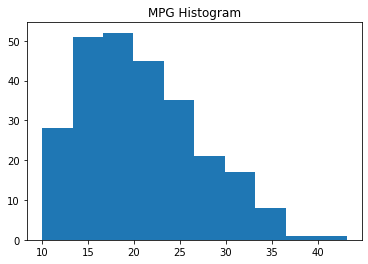

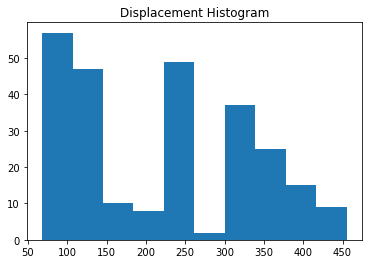

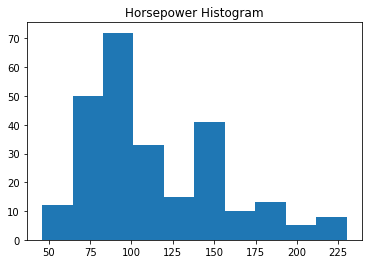

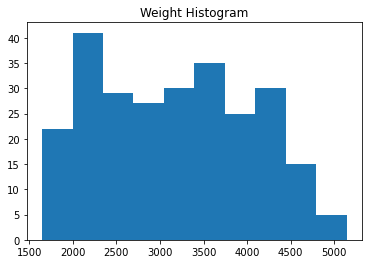

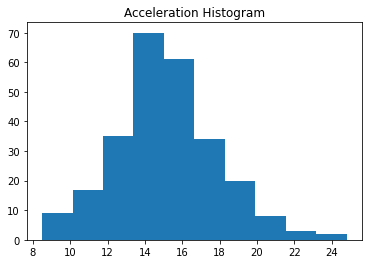

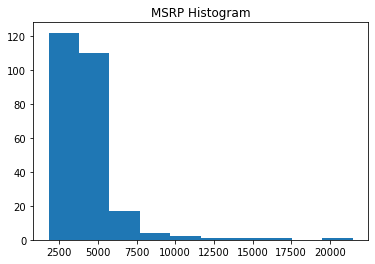

In [20]:
# Reload Files
importlib.reload(mypytable)
importlib.reload(utils)   
importlib.reload(plot_utils) 

col_names = ["MPG", "Displacement", "Horsepower", "Weight", "Acceleration", "MSRP"]

# iterate columns to plot
for col in col_names: 
    column_list = mypytable.MyPyTable.get_column(table, col)
    plot_utils.histogram(col, column_list)


## Step 4 Continuous/Continuous Relationships
### Create scatter plots that compare the following attributes to MPG (i.e. where MPG is the y-axis in each scatter plot): Displacement, Horsepower, Weight, Acceleration, MSRP
* The firts function I created is  `scatter_with_linear_regr(x, y, m, b, regression, covariance, y_label, x_label)` in *plot_utils.py* to plot the scatter plot. This function is called for each `col_names` value. 
* The other function I created is `scatter_plot_data_prep(table, col_name1, col_name2)` which will prepare the scatter plot data using 2 attribute names passed in. 

** Strong Relationships **  
* There are two Relationships that seem particullarly strong. These are in *MPG vs Displacement* which has a Correlation Coefficient of -0.83, and in *MPG vs Weight* which has a Correlation Coefficient of -0.87. 
These are particullarly strong because their Correlation Coefficient's are the close to -1 meaning they have a Strong Negative Relationship.

** Calculations **  
* Correlation Coefficient Equation:  
$r = \frac{\sum (x_i - \widehat{x})(y_i - \widehat{y})}{\sqrt{(\sum (x_i - \widehat{x})^2)(\sum (y_i - \widehat{y})^2)}}$

* Covariance Equation:  
$cov_{x,y} = \frac{\sum (x_i - \widehat{x})(y_i - \widehat{y})}{N - 1}$



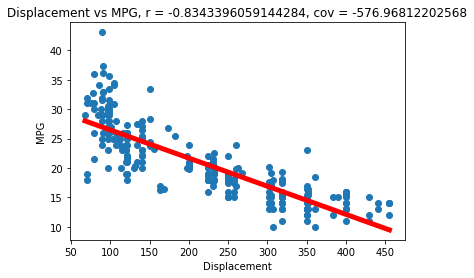

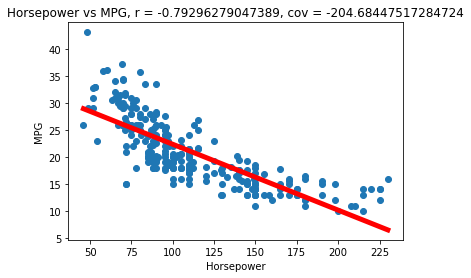

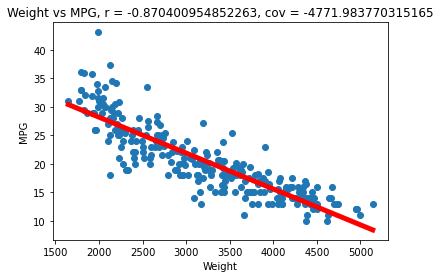

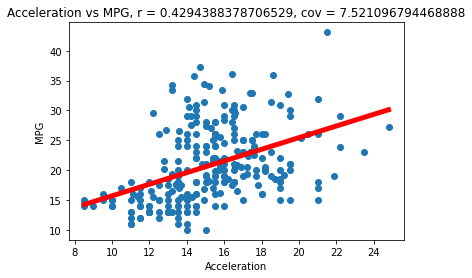

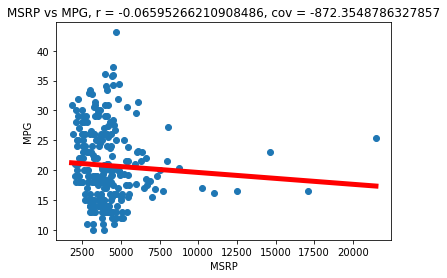

In [44]:
import importlib
import numpy as np
import matplotlib.pyplot as plt

# Reload Files
importlib.reload(mypytable)
importlib.reload(utils)   
importlib.reload(plot_utils) 

col_names = ["Displacement", "Horsepower", "Weight", "Acceleration", "MSRP"]
y = mypytable.MyPyTable.get_column(table, "MPG")

for col in col_names:
    x = mypytable.MyPyTable.get_column(table, col)
    m, b, regression, covariance = utils.scatter_plot_data_prep(table, x,y)
    plot_utils.scatter_with_linear_regr(x, y, m, b, regression, covariance, "MPG", col)

